## Story - 6 : What Is The State of Food Security and Nutrition in the US

The United Nations Food and Agriculture Organization publication, The State of Food Security and Nutrition in the World 2022 (https://www.fao.org/documents/card/en/c/cc0639en) might lead one to the conclusion that it's an elsewhere problem. That the people who are suffering malnutrition and starvation are "elsewhere", not in our backyard.

This assignment is dedicated to analyzing food security and nutrition data within the U.S., revealing how poverty correlates with food insecurity, malnutrition, and undernutrition across different states and demographic groups. The goal is to emphasize that food insecurity, especially among children, has consequences that extend far beyond childhood, affecting individuals' long-term potential to function independently as adults. With this analysis, we aim to advocate for policies that address food insecurity as a critical national issue.

### Data Sources

1. Food Security - https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/interactive-charts-and-highlights/#trends
2. United States Regions - https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv

In [ ]:
import pandas as pd
import re
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U kaleido

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

state = pd.read_csv('/content/food-security-states.csv')
household = pd.read_csv('/content/food-security-households.csv')
child = pd.read_csv('/content/child-food-security.csv')
regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
poverty = pd.read_csv('/content/sos_tab_incpov.csv')

In [ ]:
state.head()

,Year,State,Food insecurity prevalence,Food insecurity–margin of error,Very low food security prevalence,Very low food security–margin of error
0,2006–2008,U.S. total,12.2,0.25,4.6,0.18
1,2006–2008,AK,11.6,1.66,4.4,1.31
2,2006–2008,AL,13.3,1.66,5.4,1.02
3,2006–2008,AR,15.9,3.19,5.6,1.50
4,2006–2008,AZ,13.2,1.51,4.9,0.84


In [ ]:
household.head()

,Year,Category,Subcategory,Sub-subcategory,Total,"Food secure-1,000",Food secure-percent,"Food insecure-1,000",Food insecure-percent,"Low food security-1,000",Low food security-percent,"Very low food security-1,000",Very low food security-percent
0,2001,All households,NaN,NaN,107824,96303,89.3,11521,10.7,8010,7.4,3511,3.3
1,2001,Household composition,With children < 18 years,NaN,38330,32141,83.9,6189,16.1,4744,12.4,1445,3.8
2,2001,Household composition,With children < 18 years,With children < 6 years,16858,13920,82.6,2938,17.4,2304,13.7,634,3.8
3,2001,Household composition,With children < 18 years,Married-couple families,26182,23389,89.3,2793,10.7,2247,8.6,546,2.1
4,2001,Household composition,With children < 18 years,"Female head, no spouse",9080,6185,68.1,2895,31.9,2101,23.1,794,8.7


In [ ]:
child.head()

,Year,Category,Total,"Food-secure households-1,000",Food-secure households-percent,"Food-insecure households-1,000",Food-insecure households-percent,"Households with food-insecure children-1,000",Households with food-insecure children-percent,"Households with very low food security among children-1,000",Households with very low food security among children-percent
0,1998,Children - by food security status of household,"71,282","57,255",80.3,"14,027",19.7,"7,840",11.0,716,1.0
1,1998,Households with Children,"38,036","31,335",82.4,"6,701",17.6,"3,627",9.5,331,0.9
2,1999,Children - by food security status of household,"71,418","59,344",83.1,"12,074",16.9,"6,996",9.8,511,0.7
3,1999,Households with Children,"37,884","32,290",85.2,"5,594",14.8,"3,089",8.2,219,0.6
4,2000,Children - by food security status of household,"71,763","58,867",82.0,"12,896",18.0,"7,018",9.8,562,0.8


In [ ]:
states_2020_2022 = state[state['Year'] == '2020–2022'][1:]

In [ ]:
states_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 729 to 779
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     51 non-null     object 
 1   State                                    51 non-null     object 
 2   Food insecurity prevalence               51 non-null     float64
 3   Food insecurity–margin of error          51 non-null     float64
 4   Very low food security prevalence        51 non-null     float64
 5   Very low food security–margin of error   51 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.8+ KB


In [ ]:
fig = px.choropleth(data_frame=states_2020_2022,
                    locations='State',
                    locationmode='USA-states',
                    color='Food insecurity prevalence',
                    color_continuous_scale='Oranges',
                    scope='usa')

fig.update_layout(
    coloraxis_colorbar_title_text='% Prevalence',
    margin={"r":0,"t":0,"l":0,"b":0}
)


fig.show()


In [ ]:
print(round(states_2020_2022['Food insecurity prevalence'].mean(), 1)) # avg food insecurity - states
print(household[(household['Category'] == 'All households') & (household['Year'] == 2022)]['Food insecure-percent']) # avg food insecurity - all households
print(round(household[(household['Subcategory'] == 'With children < 18 years') & (household['Year'] == 2022)]['Food insecure-percent'].mean(), 1))  # avg food insecurity - households children under 18
child[(child['Category'].str.contains('Children -')) & (child['Year'] == 2022)]['Households with food-insecure children-percent']

10.8
630    12.8
Name: Food insecure-percent, dtype: float64
19.6


,Households with food-insecure children-percent
48,10.0


In [ ]:
household[(household['Category'] == 'All households') & (household['Year'] == 2022)]['Food insecure-percent'] # avg food insecurity - all households
round(household[(household['Subcategory'] == 'With children < 18 years') & (household['Year'] == 2022)]['Food insecure-percent'].mean(), 1)  # avg food insecurity - households children under 18

19.6

In [ ]:
region_avg = states_regions.groupby('Southern or Midwestern')['Food insecurity prevalence'].mean()

# Using iloc to access the values by position
print(f'Southern states have on average {round(region_avg.iloc[1] - region_avg.iloc[0], 2)}% higher food insecurity than other US states.')


Southern states have on average 2.87% higher food insecurity than other US states.


In [ ]:
child[child['Year'] == 2022]

,Year,Category,Total,"Food-secure households-1,000",Food-secure households-percent,"Food-insecure households-1,000",Food-insecure households-percent,"Households with food-insecure children-1,000",Households with food-insecure children-percent,"Households with very low food security among children-1,000",Households with very low food security among children-percent
48,2022,Children - by food security status of household,"72,595","59,201",81.5,"13,394",18.5,"7,263",10.0,783,1.1
49,2022,Households with Children,"37,235","30,798",82.7,"6,437",17.3,"3,265",8.8,381,1.0


In [ ]:
single_mother = household[household['Sub-subcategory'] == "Female head, no spouse"]
single_father = household[household['Sub-subcategory'] == "Male head, no spouse"]

both = pd.concat([single_mother, single_father])

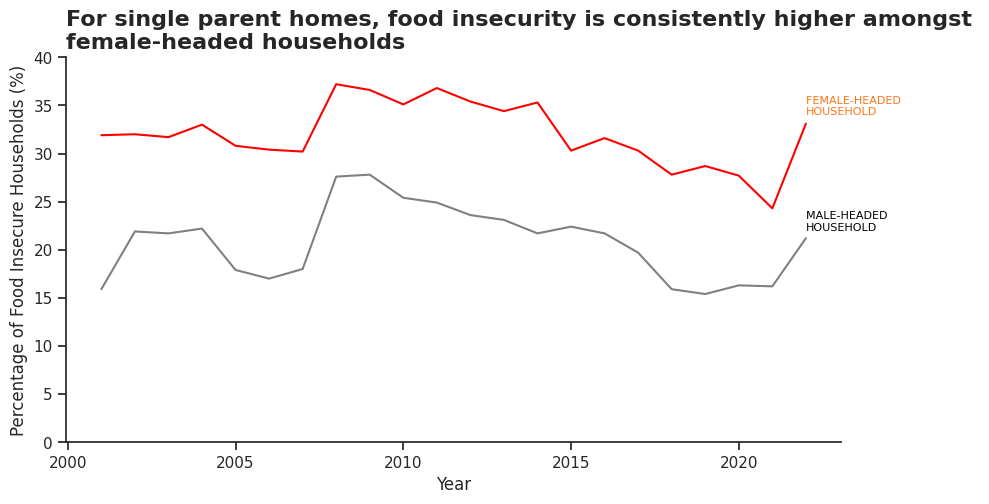

In [75]:
fig = plt.figure(figsize=(10,5))

sns.lineplot(both, x='Year', y='Food insecure-percent', hue='Sub-subcategory', palette=['red', 'gray']).legend().remove()

plt.title('For single parent homes, food insecurity is consistently higher amongst \nfemale-headed households', fontweight='bold', fontsize=16, loc='left')
plt.ylabel('Percentage of Food Insecure Households (%)')

plt.annotate('MALE-HEADED \nHOUSEHOLD', (2022, 22), fontsize=8, color='black')
plt.annotate('FEMALE-HEADED \nHOUSEHOLD', (2022, 34), fontsize=8, color='#FF7518')

plt.ylim((0,40))
plt.show()

In [ ]:
avg_insecurity = both.groupby('Sub-subcategory')['Food insecure-percent'].mean()
avg_insecurity

,Food insecure-percent
Sub-subcategory,
"Female head, no spouse",32.027273
"Male head, no spouse",20.795455


In [ ]:
print(f'Food insecurity in female-headed single parent homes is on average {round(avg_insecurity.iloc[0] - avg_insecurity.iloc[1], 2)}% higher than in male-headed households.')  # female - male


Food insecurity in female-headed single parent homes is on average 11.23% higher than in male-headed households.


In [ ]:
race = household[household['Category'] == 'Race/ethnicity of households']

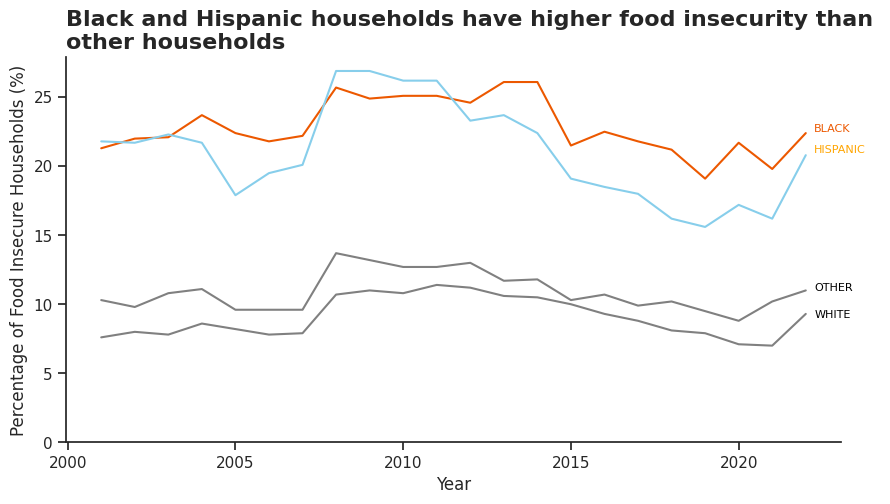

In [83]:
fig = plt.figure(figsize=(10,5))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(race, x='Year', y='Food insecure-percent', hue='Subcategory', palette=['grey', '#EC5800', 'skyblue', 'grey']).legend().remove()

plt.title('Black and Hispanic households have higher food insecurity than \nother households', fontweight='bold', fontsize=16, loc='left')
plt.ylabel('Percentage of Food Insecure Households (%)')

plt.annotate('BLACK', (2022.25, 22.5), fontsize=8, color='#EC5800')
plt.annotate('HISPANIC', (2022.25, 21), fontsize=8, color='orange')
plt.annotate('OTHER', (2022.25, 11), fontsize=8, color='black')
plt.annotate('WHITE', (2022.25, 9), fontsize=8, color='black')

plt.ylim(0)
plt.show()

In [ ]:
children = child[child['Category'].str.contains('Children - ')]

children.head()

,Year,Category,Total,"Food-secure households-1,000",Food-secure households-percent,"Food-insecure households-1,000",Food-insecure households-percent,"Households with food-insecure children-1,000",Households with food-insecure children-percent,"Households with very low food security among children-1,000",Households with very low food security among children-percent
0,1998,Children - by food security status of household,"71,282","57,255",80.3,"14,027",19.7,"7,840",11.0,716,1.0
2,1999,Children - by food security status of household,"71,418","59,344",83.1,"12,074",16.9,"6,996",9.8,511,0.7
4,2000,Children - by food security status of household,"71,763","58,867",82.0,"12,896",18.0,"7,018",9.8,562,0.8
6,2001,Children - by food security status of household,"72,321","59,620",82.4,"12,701",17.6,"6,866",9.5,467,0.6
8,2002,Children - by food security status of household,"72,542","59,415",81.9,"13,127",18.1,"7,397",10.2,567,0.8


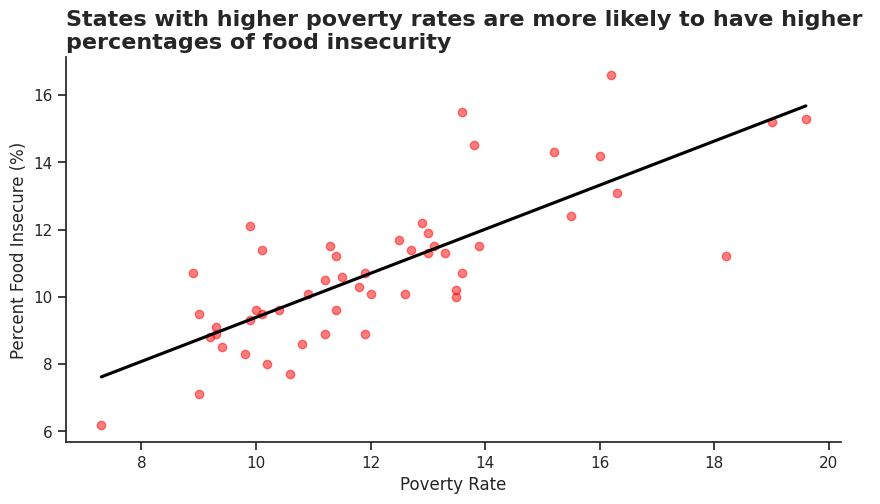

In [88]:
fig = plt.figure(figsize=(10,5))

poverty.rename({'State':"State Name"}, axis=1, inplace=True)
state_poverty = pd.merge(states_regions, poverty)
state_poverty['Poverty Rate'] = state_poverty['Poverty Rate'].apply(lambda x: re.sub('%', '', x)).apply(lambda x: float(x))

sns.regplot(state_poverty, y = 'Food insecurity prevalence', x = 'Poverty Rate', ci=None, color="red", line_kws=dict(color="black"), scatter_kws={'alpha':0.5})

plt.title('States with higher poverty rates are more likely to have higher \npercentages of food insecurity', fontweight='bold', fontsize=16, loc='left')
plt.ylabel('Percent Food Insecure (%)')

plt.show()

## Conclusion

The analysis of food security and nutrition data across the U.S. highlights the urgent need for policy intervention to address food insecurity, which disproportionately affects vulnerable populations, particularly children, single-parent households, and communities of color. Our findings indicate that food insecurity prevalence is significantly correlated with higher poverty rates, particularly in Southern and Midwestern states, emphasizing the critical link between economic hardship and limited access to adequate food. Additionally, the analysis reveals that female-headed single-parent households experience significantly higher rates of food insecurity compared to male-headed households.

The data further demonstrates the disproportionate impact on Black and Hispanic households, where food insecurity rates consistently surpass those of other racial and ethnic groups. These disparities are compounded by the long-term effects of childhood food insecurity, which can impede an individual’s ability to function independently as an adult, underscoring the importance of addressing food insecurity at a young age.

Given the strong correlation between food insecurity and poverty, alongside the persistent disparities across demographic groups, it is clear that tackling food insecurity requires a multifaceted approach. Policymakers must prioritize creating targeted solutions to address the root causes of food insecurity and ensure that all Americans, particularly those most at risk, have access to the resources they need to thrive. By doing so, we can begin to break the cycle of poverty and hunger, ultimately fostering healthier, more resilient communities across the nation.